# Data Analysis & using Jupyter Notebooks 

In this notebook, we go over data analytics using Python. We will learn about using NumPy, Pandas, and Matplotlib from the ground up.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Pandas,  NumPy, and Matplotlib

Pandas provides useful data structures and functions to manipulate data. NumPy provides mathematical operations (such as standard deviation) which can be used on data sets. Matplotlib provides data visualization for datasets.

---
## Pandas

Pandas has two main data structures, **Series** and **DataFrames**. 

Here are some useful things you can do with Pandas:
- Convert data from one format to another
- Perform arithmetic operations on rows and columns
- Merge and join data sets
- Perform statistical operations

---
### Series
A one dimensional array-like object that can hold any data type. Basically a single column in a spread sheet.

---
### DataFrames
A two dimensional table of data with rows and columns. You can think of it like a spreadsheet or SQL table, or a dictionary of series object. DataFrame is a class from Pandas.

These are some of the attributes of DataFrame():

- data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects.

- index : Index or array-like. Gives the row labels.

- columns : Index or array-like. Gives the column labels.

- dtype : dtype, default None. Data type to force. Only a single dtype is allowed. If None, infer.

- copy : bool or None, default None
    Copy data from input data propertyu. For dict data, the default of None behaves like copy=True. For DataFrame
    or 2d ndarray input, the default of None behaves like copy=False.
    If data is a dict containing one or more Series (possibly of different dtypes),
    copy=False will ensure that these inputs are not copied.

Here is an example of making a data frame with a dictionary object:

In [1]:
import pandas as pd

# Create a dictionary with sample data
data = {'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Gender': ['F', 'M', 'M']}

# Create the dataframe
df = pd.DataFrame(data)

# Print the dataframe
df

,Name,Age,Gender
0,Alice,25,F
1,Bob,30,M
2,Charlie,35,M


The above example shows making a data frame from a Python dictionary. Each key value pair will be inserted as a column. Another way we might make a data frame is by passing in an `ndarray` as our data and specifying the columns manually.

In [4]:
import pandas as pd
import numpy as np

# create an ndarray
data_array = np.array([[1, 'Alice', 24], 
                       [2, 'Bob', 41], 
                       [3, 'Charlie', 17]])

# specify column names
columns = ['ID', 'Name', 'Age']

# create the DataFrame
df = pd.DataFrame(data=data_array, columns=columns)

df

,ID,Name,Age
0,1,Alice,24
1,2,Bob,41
2,3,Charlie,17


In this case, each element in the `ndarray` gets passed as a row into the data frame. Note that all the rows are labelled 0, 1, 2. By default, Pandas will make a data frame with the row names as range-index (going from 0 to n for n + 1 rows of data). 

Just like we specified columns, we can specify the rows. Usually we don't do this because an index works, but suppose we would like to change our row names to A, B, C:

In [2]:
data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}

# we can specify the rows using index argument
df = pd.DataFrame(data, index=['A', 'B', 'C'])

df

NameError: name 'pd' is not defined

Observe that we no longer have 0, 1, 2, but instead A, B, C for the row labels.

---
## Matplotlib

### Intro

Matplotlib is a fairly easy to use tool. It is mainly for just visualizing graphs or depictions of data. You just need to memorize different functions and the syntax to use, that's it.

**plt.show()** : used to show the most recently plot created using `matplotlib.pyplot`. 
- optional for Jupyter because the notebook interface automatically displays plot (but it's cleaner when we use it regardless)
- needed for actual Python scripts or it won't show otherwise
- also starts and event loop that waits for any interactions with the figure such as key presses or mouse clicks. the loop termiantes when the figure is closed
- blocks python script from executing while showing the figure. this is because of the event loop. control is returned to the script when figure is closed

### Box Plots

Box plots, also known as box and whisker plots, are a compact graphical depiction of some distribution data. For example, we can make a box plot for the grade distribution of students at a university.

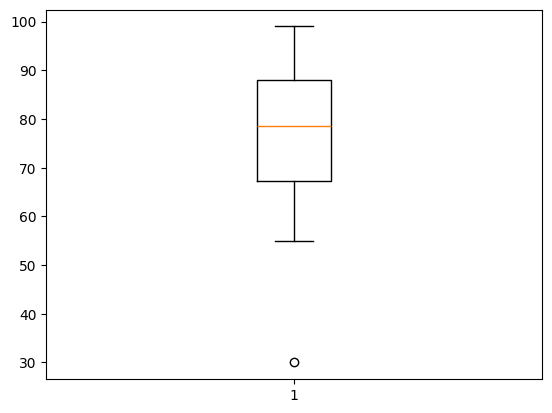

In [3]:
import matplotlib.pyplot as plt

grades = [88, 74, 96, 85, 62, 55, 91, 77, 83, 90, 78, 80, 87, 95, 72, 69, 88, 92, 85, 76, 93, 81, 94, 79, 84, 70, 89, 82, 75, 86, 73, 97, 68, 71, 98, 67, 60, 99, 66, 63, 30, 65, 61, 59, 64, 58]
plt.boxplot(grades)
plt.show()

## Numpy

### Matrix Multiplication

We will write a Python script to generate two random matrices, multiply them, and chek whether their result is identical. 

We show matrix multiplication both with NumPy and using for loops.

In [12]:
import numpy as np

def multiply_with_loops(A, B):
    # get the dimensions of the input matrices
    # we will assume that the matrices are just nested lists
    rows_A = len(A)
    cols_A = len(A[0])
    cols_B = len(B[0])
    C = [[0 for row in range(cols_B)] for col in range(rows_A)]

    # we will assume that the matrices are compatible for multiplication
    for i in range(rows_A): # iterate over the rows of A
        for j in range(cols_B): # iterate over the columns of B
            for k in range(cols_A): 
                C[i][j] += A[i][k] * B[k][j]

    return C

def multiply_with_numpy(A, B):
    return np.dot(A, B)

def check_equal(A, B):
    A = np.array(A)
    return np.allclose(A, B) # this function checks if two arrays are equal within some tolerance 
    # this is because numpy arrays round off the values more than python lists

# create two random matrices of dimensions 2x3 and 3x4 respectively
A = np.random.rand(2, 3)
B = np.random.rand(3, 4)

check_equal(multiply_with_loops(A, B), multiply_with_numpy(A, B))

True